<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pricipal Component Analysis (PCA)

PCA is mostly used to reduce the dimension the input data. It gives a best fitting orthogonal system. The principal orthogonal directions will be the eigenvectors of the variance-covariance matrix to the weight point of the point set. Numpy has all the basic functions for PCA calculations.

In the next example we'll find the principal components of a 2D point set.

In [1]:
# importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from math import (sin, cos, atan2, pi)

Let's generate a normaly distributed point set.

In [2]:
# generating normal distribution 2D point set with mean (0,0) and covariance matrix
X = np.random.multivariate_normal([0, 0], [[10, 5], [5, 100]], 500)
# transform points (rotate 60 deg and shift to (10,20))
alpha = -pi / 3.    # 60 deg in radians
# 2D rotation matrix
rot = np.array([[cos(alpha), sin(alpha)], [-sin(alpha), cos(alpha)]])
# rotate and shift points
X = X.dot(rot) + np.array([10, 20])

Let's display the point set

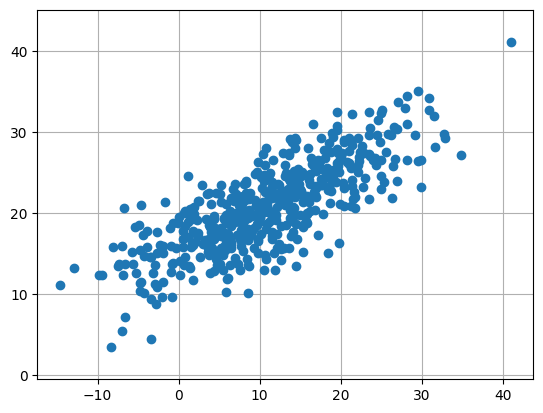

In [3]:
plt.plot(X[:,0], X[:,1], 'o')
plt.axis('equal')
plt.grid()

Let's set up the variance and covariance matrix of the points to the weight point and get the eigenvectors.

weight point: [10.9 20.7]
direction [degree]: 62.0


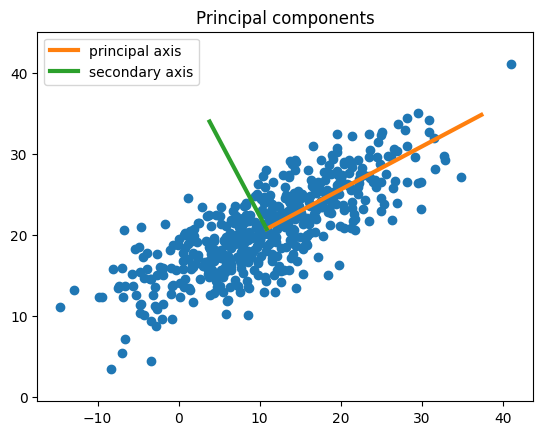

In [7]:
means = np.mean(X, 0)   # mean of coordinates
Xd = X - means          # differences from mean point
cov = Xd.T.dot(Xd)      # variance covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov)
# principal direction is the first eigenvector
direction = atan2(eig_vectors[0][0], eig_vectors[1][0]) * 180 / pi # bearing
print(f"weight point: {np.array2string(means, precision=1, floatmode='fixed')}")
print(f"direction [degree]: {direction:.1f}")
# plot points and axles
X1 = np.array([means[0], means[0] + eig_vectors[0][0] * 30.])
Y1 = np.array([means[1], means[1] + eig_vectors[1][0] * 30.])
X2 = np.array([means[0], means[0] + eig_vectors[0][1] * 15.])
Y2 = np.array([means[1], means[1] + eig_vectors[1][1] * 15.])
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(X1, Y1, linewidth=3, label='principal axis')
plt.plot(X2, Y2, linewidth=3, label='secondary axis')
plt.axis('equal')
plt.legend()
_ = plt.title('Principal components')

The scikit-learn package has direct PCA solution and has extra functionalities.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)      # pca.mean_ and pca.components_ (eigen vectors) are calculated
print(f"weight point: {np.array2string(pca.mean_, precision=1, floatmode='fixed')}")        # weightpoint
#print(pca.components_)
direction = atan2(pca.components_[0][0], pca.components_[1][0]) * 180 / pi # bearing
print(f"direction [degree]: {direction:.1f}")
#print(pca.singular_values_)
print(f"variance ratio: {np.array2string(pca.explained_variance_ratio_, precision=2, floatmode='fixed')}")

weight point: [10.9 20.7]
direction [degree]: 62.0
variance ratio: [0.92 0.08]


From the variance ratio we can realize the first componens is much more significant. Let's transform the original values to the bases of eigenvectors and keep only the significant coordinates, reducing the dimension.

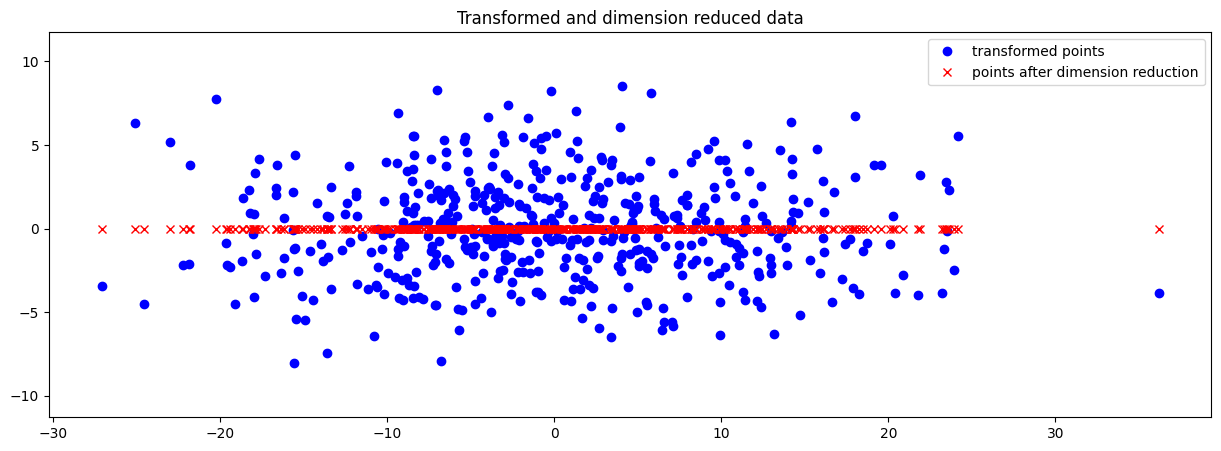

In [9]:
X_tr = pca.transform(X)
X_reduced = X_tr[:,0]
plt.figure(figsize=(15,5))
plt.plot(X_tr[:,0], X_tr[:,1], 'bo', label="transformed points")
plt.plot(X_reduced, np.zeros(X_reduced.size), 'rx', label="points after dimension reduction")
plt.axis('equal')
plt.legend()
_ = plt.title('Transformed and dimension reduced data')